In [1]:
import os
import torch
import pandas as pd
import scanpy as sc
from sklearn import metrics
import multiprocessing as mp

In [2]:
from GraphST import GraphST

In [3]:
# Run device, by default, the package is implemented on 'cpu'. We recommend using GPU.
device = torch.device('cuda:1' if torch.cuda.is_available() else 'cpu')

# the location of R, which is necessary for mclust algorithm. Please replace the path below with local R installation path
os.environ['R_HOME'] = 'C:/Users/AGNISH/.conda/envs/GraphST/Lib/R/'

In [4]:
# the number of clusters
n_clusters = 7

In [5]:
dataset = 'Proteins'

In [8]:
#input_dir = 'C:/Users/AGNISH/Desktop/IITK/VSCode/GraphST/151673/'
#adata = sc.read_10x_h5(input_dir +'filtered_feature_bc_matrix.h5')
#adata.var_names_make_unique()

# read data
file_fold = 'C:/Users/AGNISH/GraphST/Data/' + str(dataset) #please replace 'file_fold' with the download path
adata = sc.read_10x_h5(file_fold + '/5k_pbmc_protein_v3_nextgem_filtered_feature_bc_matrix.h5')
adata.var_names_make_unique()

c:\Users\AGNISH\.conda\envs\GraphST\lib\site-packages\anndata\_core\anndata.py:1830: UserWarning: Variable names are not unique. To make them unique, call `.var_names_make_unique`.
  utils.warn_names_duplicates("var")


In [9]:
adata

AnnData object with n_obs × n_vars = 5527 × 33538
    var: 'gene_ids', 'feature_types', 'genome'

In [10]:
adata.obs

""
AAACCCACAGGCTTGC-1
AAACCCAGTAGTTAGA-1
AAACGAAGTAACGATA-1
AAACGAAGTGGATCAG-1
AAACGAATCATGAGAA-1
...
TTTGGAGGTATCGATC-1
TTTGGTTCAATTTCCT-1
TTTGGTTGTTGGAGAC-1
TTTGTTGCAGGATGAC-1


In [11]:
adata.var

,gene_ids,feature_types,genome
MIR1302-2HG,ENSG00000243485,Gene Expression,GRCh38
FAM138A,ENSG00000237613,Gene Expression,GRCh38
OR4F5,ENSG00000186092,Gene Expression,GRCh38
AL627309.1,ENSG00000238009,Gene Expression,GRCh38
AL627309.3,ENSG00000239945,Gene Expression,GRCh38
...,...,...,...
AC233755.2,ENSG00000277856,Gene Expression,GRCh38
AC233755.1,ENSG00000275063,Gene Expression,GRCh38
AC240274.1,ENSG00000271254,Gene Expression,GRCh38
AC213203.1,ENSG00000277475,Gene Expression,GRCh38


Scanpy CITEseq Documentation

In [14]:
import scanpy as sc
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib as mpl

In [15]:
sc.logging.print_versions()
sc.set_figure_params(frameon=False, figsize=(4, 4))

-----
anndata     0.8.0
scanpy      1.9.3
-----
GraphST             NA
PIL                 9.5.0
asttokens           NA
backcall            0.2.0
beta_ufunc          NA
binom_ufunc         NA
cffi                1.15.1
colorama            0.4.6
comm                0.1.3
cycler              0.10.0
cython_runtime      NA
dateutil            2.8.2
debugpy             1.6.7
decorator           5.1.1
executing           1.2.0
h5py                3.8.0
hypergeom_ufunc     NA
importlib_resources NA
invgauss_ufunc      NA
ipykernel           6.23.1
jedi                0.18.2
joblib              1.2.0
kiwisolver          1.4.4
llvmlite            0.40.0
matplotlib          3.7.1
mpl_toolkits        NA
mpmath              1.3.0
natsort             8.3.1
nbinom_ufunc        NA
ncf_ufunc           NA
nct_ufunc           NA
ncx2_ufunc          NA
nt                  NA
ntsecuritycon       NA
numba               0.57.0
numpy               1.24.3
ot                  0.9.0
packaging           23.1
pan

In [17]:
datafile = "C:/Users/AGNISH/GraphST/Data/Proteins/5k_pbmc_protein_v3_nextgem_filtered_feature_bc_matrix.h5"

In [18]:
pbmc = sc.read_10x_h5(datafile, gex_only=False)
pbmc.var_names_make_unique()
pbmc.layers["counts"] = pbmc.X.copy()
sc.pp.filter_genes(pbmc, min_counts=1)
pbmc

c:\Users\AGNISH\.conda\envs\GraphST\lib\site-packages\anndata\_core\anndata.py:1830: UserWarning: Variable names are not unique. To make them unique, call `.var_names_make_unique`.
  utils.warn_names_duplicates("var")


AnnData object with n_obs × n_vars = 5527 × 21453
    var: 'gene_ids', 'feature_types', 'genome', 'n_counts'
    layers: 'counts'

In [19]:
pbmc.var["feature_types"].value_counts()

Gene Expression     21421
Antibody Capture       32
Name: feature_types, dtype: int64

In [20]:
protein = pbmc[:, pbmc.var["feature_types"] == "Antibody Capture"].copy()
rna = pbmc[:, pbmc.var["feature_types"] == "Gene Expression"].copy()

In [21]:
rna.shape

(5527, 21421)

In [22]:
pbmc.shape

(5527, 21453)

In [23]:
protein.var["control"] = protein.var_names.str.contains("control")
sc.pp.calculate_qc_metrics(
    protein,
    percent_top=(5, 10, 15),
    var_type="antibodies",
    qc_vars=("control",),
    inplace=True,
)

In [25]:
protein.layers["counts"] = protein.X.copy()

In [29]:
sc.pp.normalize_total(protein)
sc.pp.log1p(protein)

In [33]:
sc.pp.pca(protein, n_comps=20)
sc.pp.neighbors(protein, n_neighbors=30)  # why can't we just work with the default neighbors?
sc.tl.leiden(protein, key_added="protein_leiden")

c:\Users\AGNISH\.conda\envs\GraphST\lib\site-packages\scanpy\plotting\_tools\scatterplots.py:392: UserWarning: No data for colormapping provided via 'c'. Parameters 'cmap' will be ignored
  cax = scatter(


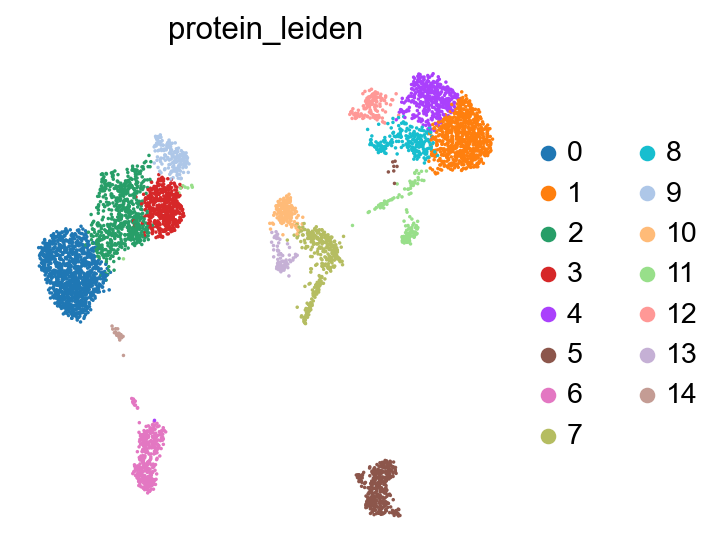

In [34]:
# TODO: remove
protein.obsp["protein_connectivities"] = protein.obsp["connectivities"].copy()
sc.tl.umap(protein)
sc.pl.umap(protein, color="protein_leiden", size=10)

In [35]:
protein

AnnData object with n_obs × n_vars = 5527 × 32
    obs: 'n_antibodies_by_counts', 'log1p_n_antibodies_by_counts', 'total_counts', 'log1p_total_counts', 'pct_counts_in_top_5_antibodies', 'pct_counts_in_top_10_antibodies', 'pct_counts_in_top_15_antibodies', 'total_counts_control', 'log1p_total_counts_control', 'pct_counts_control', 'protein_leiden'
    var: 'gene_ids', 'feature_types', 'genome', 'n_counts', 'control', 'n_cells_by_counts', 'mean_counts', 'log1p_mean_counts', 'pct_dropout_by_counts', 'total_counts', 'log1p_total_counts'
    uns: 'log1p', 'pca', 'neighbors', 'leiden', 'umap', 'protein_leiden_colors'
    obsm: 'X_pca', 'X_umap'
    varm: 'PCs'
    layers: 'counts'
    obsp: 'distances', 'connectivities', 'protein_connectivities'

In [32]:
%pip install leidenalg

                                              0.0/103.4 kB ? eta -:--:--
     ----------                            30.7/103.4 kB 435.7 kB/s eta 0:00:01
     ---------------------                 61.4/103.4 kB 544.7 kB/s eta 0:00:01
     ------------------------------------ 103.4/103.4 kB 745.1 kB/s eta 0:00:00
                                              0.0/2.9 MB ? eta -:--:--
     -                                        0.1/2.9 MB ? eta -:--:--
     --                                       0.2/2.9 MB 1.8 MB/s eta 0:00:02
     ---                                      0.3/2.9 MB 2.0 MB/s eta 0:00:02
     ----                                     0.4/2.9 MB 1.7 MB/s eta 0:00:02
     ------                                   0.4/2.9 MB 1.7 MB/s eta 0:00:02
     ------                                   0.5/2.9 MB 1.7 MB/s eta 0:00:02
     -------                                  0.5/2.9 MB 1.6 MB/s eta 0:00:02
     --------                                 0.6/2.9 MB 1.5 MB/s eta 0:00:02

In [36]:
protein.obs

,n_antibodies_by_counts,log1p_n_antibodies_by_counts,total_counts,log1p_total_counts,pct_counts_in_top_5_antibodies,pct_counts_in_top_10_antibodies,pct_counts_in_top_15_antibodies,total_counts_control,log1p_total_counts_control,pct_counts_control,protein_leiden
AAACCCACAGGCTTGC-1,31,3.465736,4761.0,8.468423,94.265911,98.004621,98.823777,11.0,2.484907,0.231044,1
AAACCCAGTAGTTAGA-1,30,3.433987,4010.0,8.296796,92.194514,97.231920,98.478803,2.0,1.098612,0.049875,4
AAACGAAGTAACGATA-1,29,3.401197,1824.0,7.509335,84.978070,95.778509,98.245614,7.0,2.079442,0.383772,4
AAACGAAGTGGATCAG-1,30,3.433987,3144.0,8.053569,95.451654,97.519084,98.632316,9.0,2.302585,0.286260,1
AAACGAATCATGAGAA-1,31,3.465736,3118.0,8.045268,86.273252,96.632457,98.107761,8.0,2.197225,0.256575,0
...,...,...,...,...,...,...,...,...,...,...,...
TTTGGAGGTATCGATC-1,30,3.433987,2005.0,7.603898,91.820449,96.209476,97.955112,10.0,2.397895,0.498753,3
TTTGGTTCAATTTCCT-1,31,3.465736,4323.0,8.371936,95.512376,97.848716,98.820264,4.0,1.609438,0.092528,1
TTTGGTTGTTGGAGAC-1,27,3.332205,1132.0,7.032624,83.657244,93.727915,96.643110,6.0,1.945910,0.530035,7
TTTGTTGCAGGATGAC-1,31,3.465736,3343.0,8.114923,92.102902,97.188154,98.564164,12.0,2.564949,0.358959,4


In [37]:
protein.var

,gene_ids,feature_types,genome,n_counts,control,n_cells_by_counts,mean_counts,log1p_mean_counts,pct_dropout_by_counts,total_counts,log1p_total_counts
CD3_TotalSeqB,CD3,Antibody Capture,,1736565.0,False,5517,314.196686,5.753197,0.180930,1736565.0,14.367420
CD4_TotalSeqB,CD4,Antibody Capture,,2957270.0,False,5510,535.058777,6.284244,0.307581,2957270.0,14.899777
CD8a_TotalSeqB,CD8a,Antibody Capture,,243254.0,False,5415,44.011940,3.806928,2.026416,243254.0,12.401866
CD11b_TotalSeqB,CD11b,Antibody Capture,,3384634.0,False,5524,612.381775,6.418988,0.054279,3384634.0,15.034757
CD14_TotalSeqB,CD14,Antibody Capture,,1191379.0,False,5525,215.556183,5.377850,0.036186,1191379.0,13.990623
CD15_TotalSeqB,CD15,Antibody Capture,,62087.0,False,5506,11.233399,2.504170,0.379953,62087.0,11.036308
CD16_TotalSeqB,CD16,Antibody Capture,,106938.0,False,4770,19.348289,3.012997,13.696399,106938.0,11.580014
CD19_TotalSeqB,CD19,Antibody Capture,,188130.0,False,5123,34.038357,3.556443,7.309571,188130.0,12.144894
CD20_TotalSeqB,CD20,Antibody Capture,,321451.0,False,5497,58.160122,4.080248,0.542790,321451.0,12.680604
CD25_TotalSeqB,CD25,Antibody Capture,,51553.0,False,5328,9.327483,2.334809,3.600507,51553.0,10.850385


GraphST Training

In [9]:
# define model
model = GraphST.GraphST(adata, device=device)

# train model
adata = model.train()

Begin to train ST data...


100%|██████████| 600/600 [04:34<00:00,  2.18it/s]


Optimization finished for ST data!


In [10]:
adata

AnnData object with n_obs × n_vars = 1708 × 31053
    obs: 'in_tissue', 'array_row', 'array_col'
    var: 'gene_ids', 'feature_types', 'genome', 'highly_variable', 'highly_variable_rank', 'means', 'variances', 'variances_norm', 'mean', 'std'
    uns: 'spatial', 'hvg', 'log1p'
    obsm: 'spatial', 'distance_matrix', 'graph_neigh', 'adj', 'label_CSL', 'feat', 'feat_a', 'emb'

In [11]:
%pip install -i https://test.pypi.org/simple/ "scikit-misc==0.2.0rc1"

Looking in indexes: https://test.pypi.org/simple/
  Using cached https://test-files.pythonhosted.org/packages/a5/f7/c8348e6fa8173c5298f125dc889b9c122f135f6d35c24643d3120d30882c/scikit_misc-0.2.0rc1-cp38-cp38-win_amd64.whl (9.9 MB)
  Attempting uninstall: scikit-misc
    Found existing installation: scikit-misc 0.1.4
    Uninstalling scikit-misc-0.1.4:
      Successfully uninstalled scikit-misc-0.1.4
Note: you may need to restart the kernel to use updated packages.


In [21]:
# set radius to specify the number of neighbors considered during refinement
radius = 50

tool = 'mclust' # mclust, leiden, and louvain

# clustering
from GraphST.utils import clustering

if tool == 'mclust':
   clustering(adata, n_clusters, radius=radius, method=tool, refinement=True) # For DLPFC dataset, we use optional refinement step.
elif tool in ['leiden', 'louvain']:
   clustering(adata, n_clusters, radius=radius, method=tool, start=0.1, end=2.0, increment=0.01, refinement=False)

fitting ...
  |======================================================================| 100%


In [37]:
%Rinstall.packages("mclust")


UsageError: Line magic function `%Rinstall.packages("mclust")` not found.


In [24]:
# add ground_truth
df_meta = pd.read_csv(file_fold + '/metadata.tsv', sep='\t')
df_meta_layer = df_meta['layer_guess']
adata.obs['ground_truth'] = df_meta_layer.values

In [25]:
# filter out NA nodes
adata = adata[~pd.isnull(adata.obs['ground_truth'])]

# calculate metric ARI
ARI = metrics.adjusted_rand_score(adata.obs['domain'], adata.obs['ground_truth'])
adata.uns['ARI'] = ARI

print('Dataset:', dataset)
print('ARI:', ARI)

c:\Users\AGNISH\.conda\envs\GraphST\lib\site-packages\anndata\compat\_overloaded_dict.py:106: ImplicitModificationWarning: Trying to modify attribute `._uns` of view, initializing view as actual.
  self.data[key] = value


Dataset: 151673
ARI: 0.6331903767517718


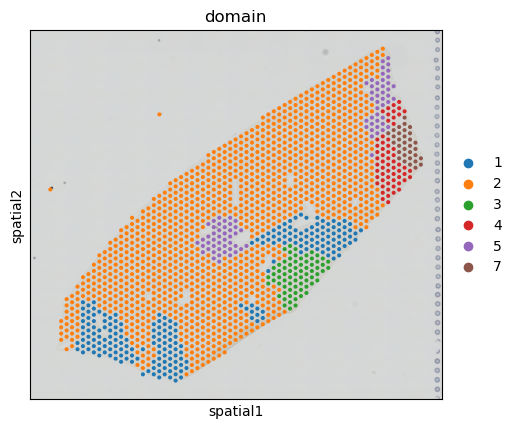

In [22]:
# plotting spatial clustering result
sc.pl.spatial(adata,
              img_key="hires",
              #color=["ground_truth", "domain"],
              color=["domain"],
              #title=["Ground truth", "ARI=%.4f"%ARI],
              show=True)

c:\Users\AGNISH\.conda\envs\GraphST\lib\site-packages\umap\distances.py:1063: NumbaDeprecationWarning: The 'nopython' keyword argument was not supplied to the 'numba.jit' decorator. The implicit default value for this argument is currently False, but it will be changed to True in Numba 0.59.0. See https://numba.readthedocs.io/en/stable/reference/deprecation.html#deprecation-of-object-mode-fall-back-behaviour-when-using-jit for details.
  @numba.jit()
c:\Users\AGNISH\.conda\envs\GraphST\lib\site-packages\umap\distances.py:1071: NumbaDeprecationWarning: The 'nopython' keyword argument was not supplied to the 'numba.jit' decorator. The implicit default value for this argument is currently False, but it will be changed to True in Numba 0.59.0. See https://numba.readthedocs.io/en/stable/reference/deprecation.html#deprecation-of-object-mode-fall-back-behaviour-when-using-jit for details.
  @numba.jit()
c:\Users\AGNISH\.conda\envs\GraphST\lib\site-packages\umap\distances.py:1086: NumbaDepreca

<Axes: title={'center': 'Predicted labels'}, xlabel='UMAP1', ylabel='UMAP2'>

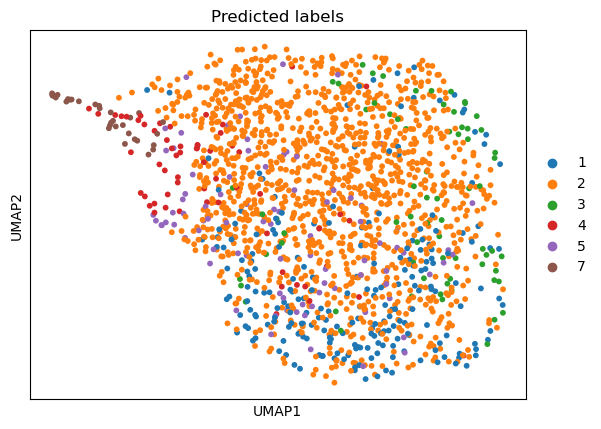

In [23]:
# plotting predicted labels by UMAP
sc.pp.neighbors(adata, use_rep='emb_pca', n_neighbors=10)
sc.tl.umap(adata)
sc.pl.umap(adata, color='domain', title=['Predicted labels'], show=False)